# Custom map simulations

In this tutorial we will build a simulation from scratch.

We start by defining a `Band` that will determine our array's sensitivity to different spectra. We then generate an array by specifying a field of view, which will be populated by evenly-spaced beams of the given band.

In [1]:
import maria
from maria.instrument import Band

f090 = Band(
    center=90e9,  # in Hz
    width=20e9,  # in Hz
    NET_RJ=40e-6,  # in K sqrt(s)
    knee=1e0,    # in Hz
    gain_error=5e-2)

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=60e-6, 
    knee=1e0, 
    gain_error=5e-2)

Instrument(1 array)
├ arrays:
│             n     FOV baseline        bands polarized
│  array1  1356  5.953’      0 m  [f090,f150]     False
│ 
└ bands:
      name   center   width    η         NEP   NET_RJ     NET_CMB    FWHM
   0  f090   90 GHz  20 GHz  0.5  5.445 aW√s  40 uK√s  49.13 uK√s  8.748”
   1  f150  150 GHz  30 GHz  0.5  12.25 aW√s  60 uK√s    104 uK√s  5.249”


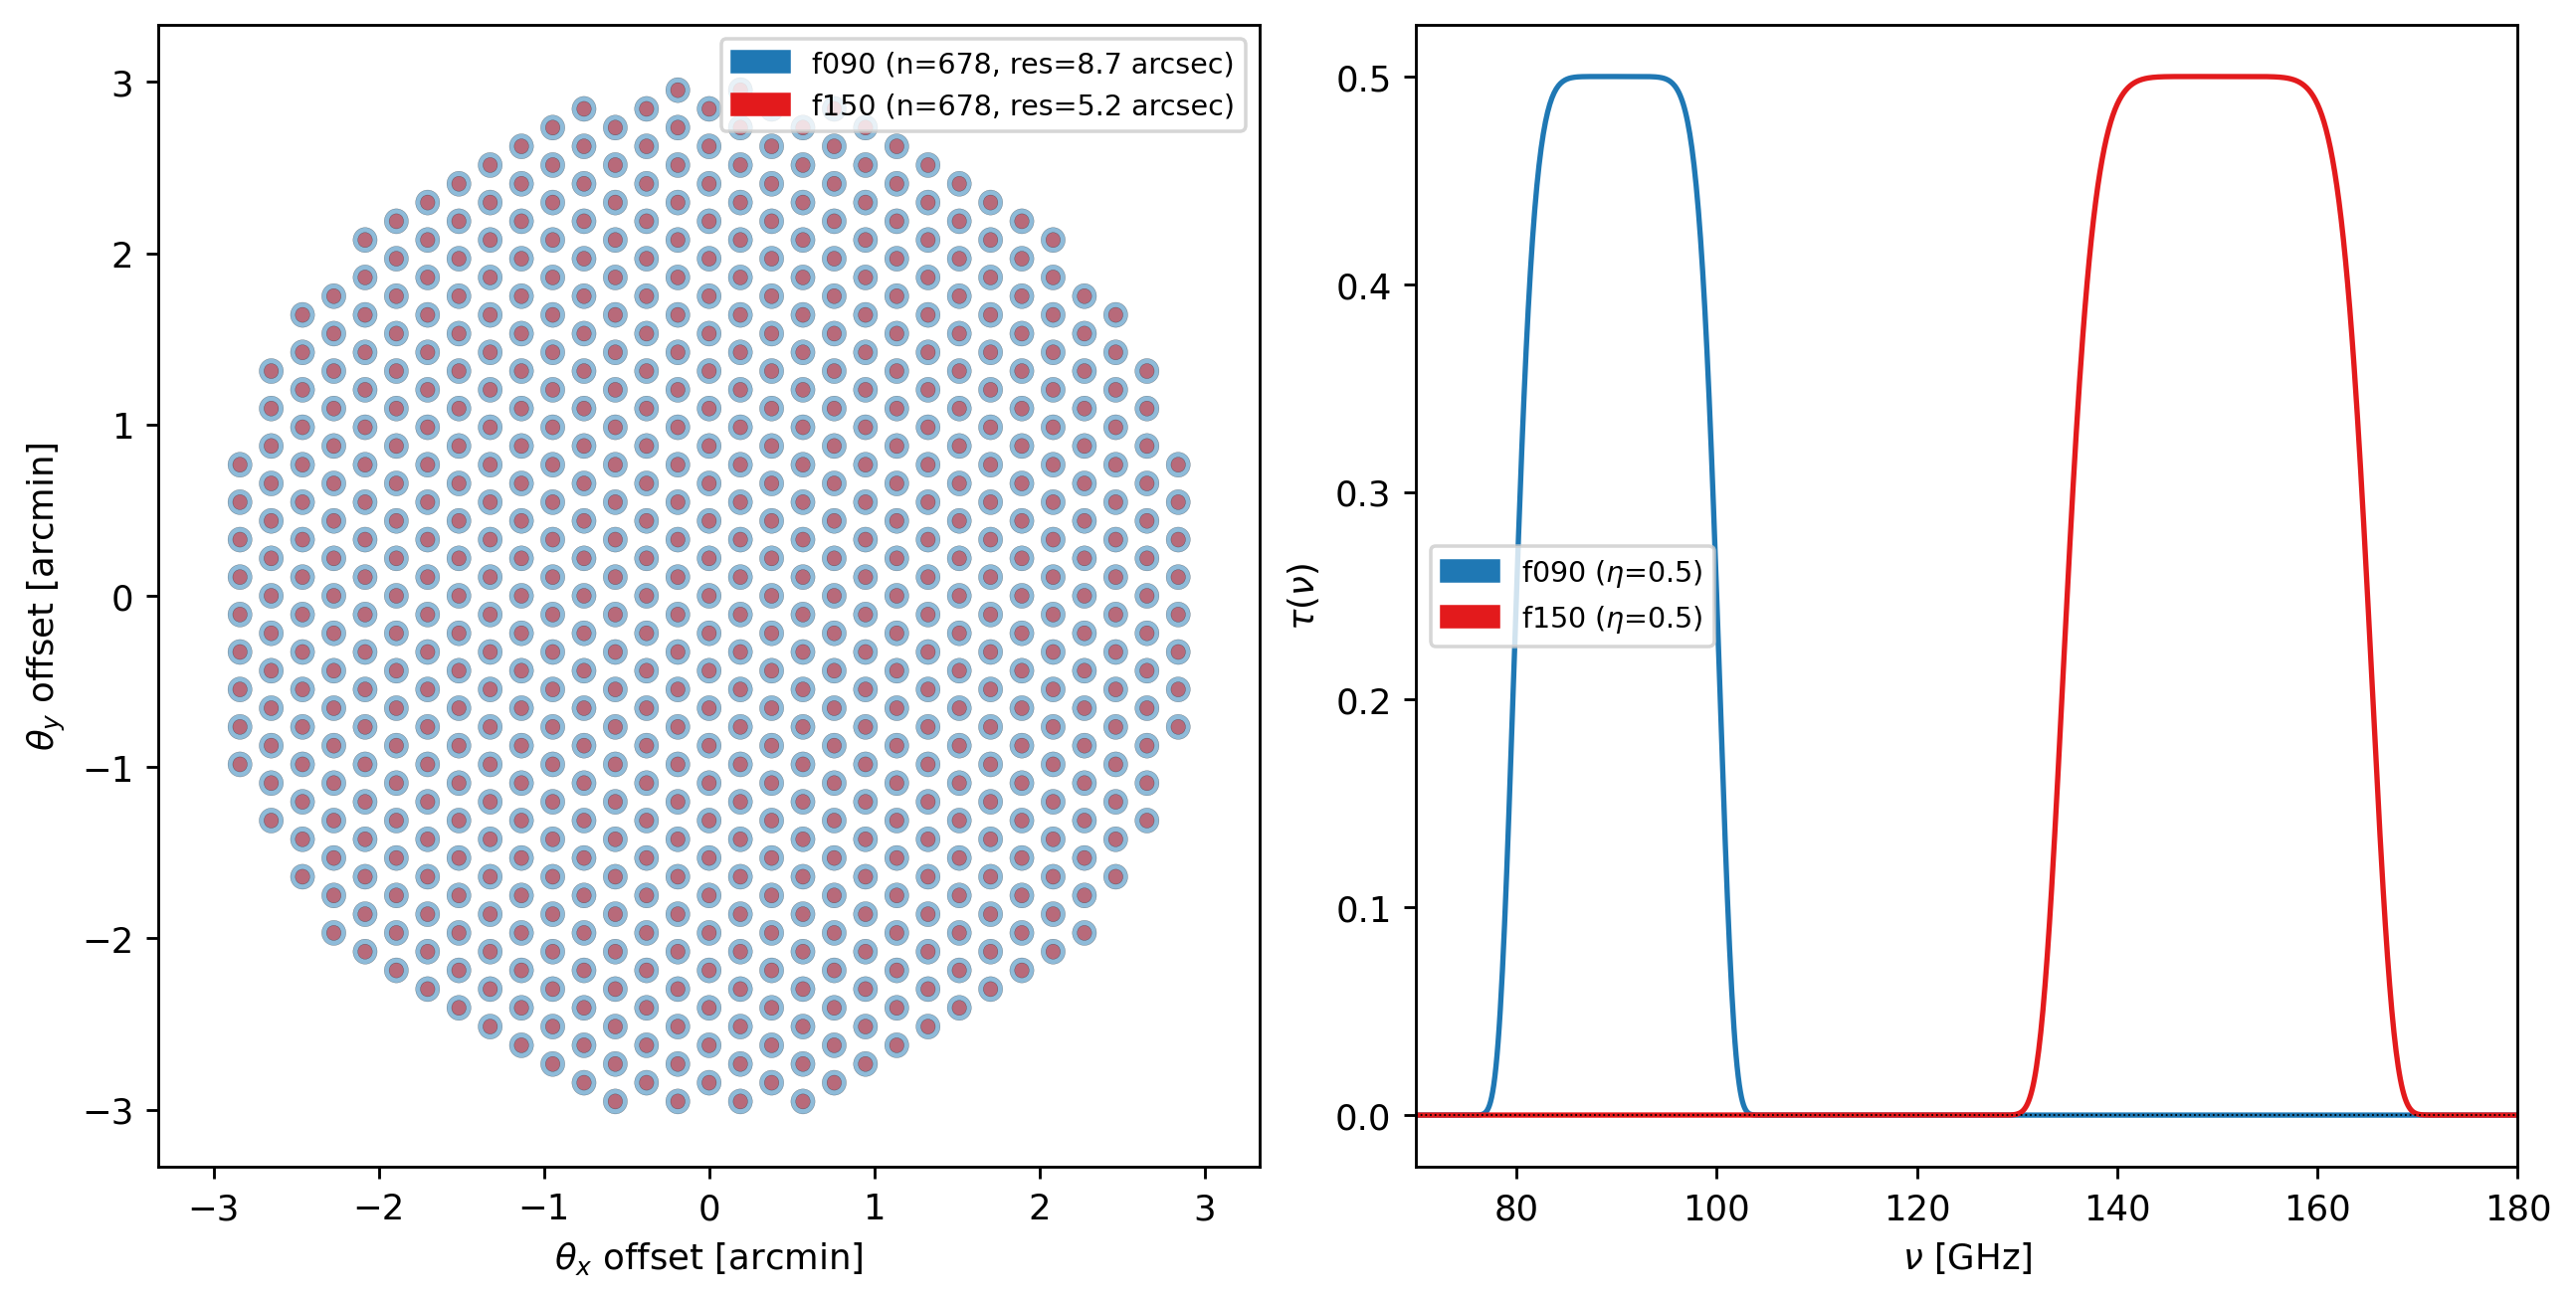

In [2]:
array = {"field_of_view": 0.1, 
         "shape": "circle", 
         "beam_spacing": 1.5,
         "primary_size": 100, 
         "bands": [f090, f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

Here, the `fetch` function downloads a map to the path `map_filename`, but `map_filename` can be any `.h5` or `.fits` file of an image that corresponds to the `maria` map convention (see [Maps](https://thomaswmorris.com/maria/usage/inputs/maps)).

<Response [200]>


ProjectedMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  quantity: rayleigh_jeans_temperature
  units: K_RJ
    min: 2.014e-06
    max: 1.548e-03
  center:
    ra: 19ʰ24ᵐ37.44ˢ
    dec: -31°13’48.00”
  size(y, x): (15’, 15’)
  resolution(y, x): (0.8789”, 0.8789”)
  memory: 8.389 MB


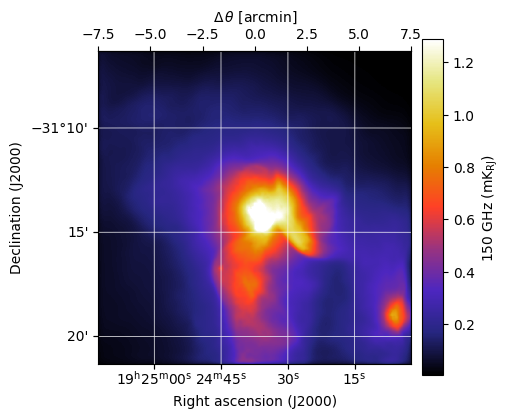

In [3]:
from maria.io import fetch

map_filename = fetch("maps/big_cluster.fits")

input_map = maria.map.load(
    filename=map_filename,
    nu=150e9,
    width=0.25,
    center=(291.156, -31.23),
    units="K_RJ")

print(input_map)
input_map.to("K_RJ").plot()

Site:
  region: chajnantor
  location: 23°01’45.84”S 67°45’17.28”W
  altitude: 5.065 km
  seasonal: True
  diurnal: True


<Response [200]>


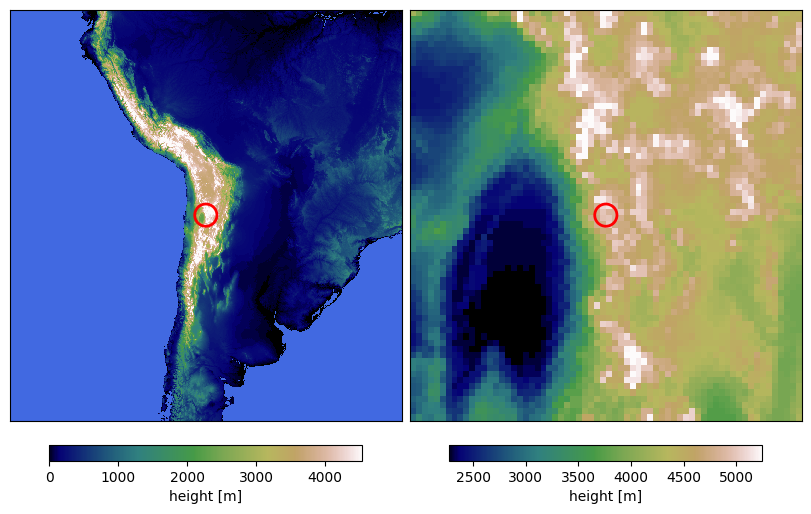

In [4]:
site = maria.get_site("llano_de_chajnantor", altitude=5065)

print(site)
site.plot()

Plan:
  start_time: 2024-08-06 03:00:00.000 +00:00
  duration: 900 s
  sample_rate: 50 Hz
  center:
    ra: 19ʰ24ᵐ37.44ˢ
    dec: -31°13’48.00”
  scan_pattern: daisy
  scan_radius: 11.99’
  scan_kwargs: {'radius': 0.1, 'speed': 0.01}


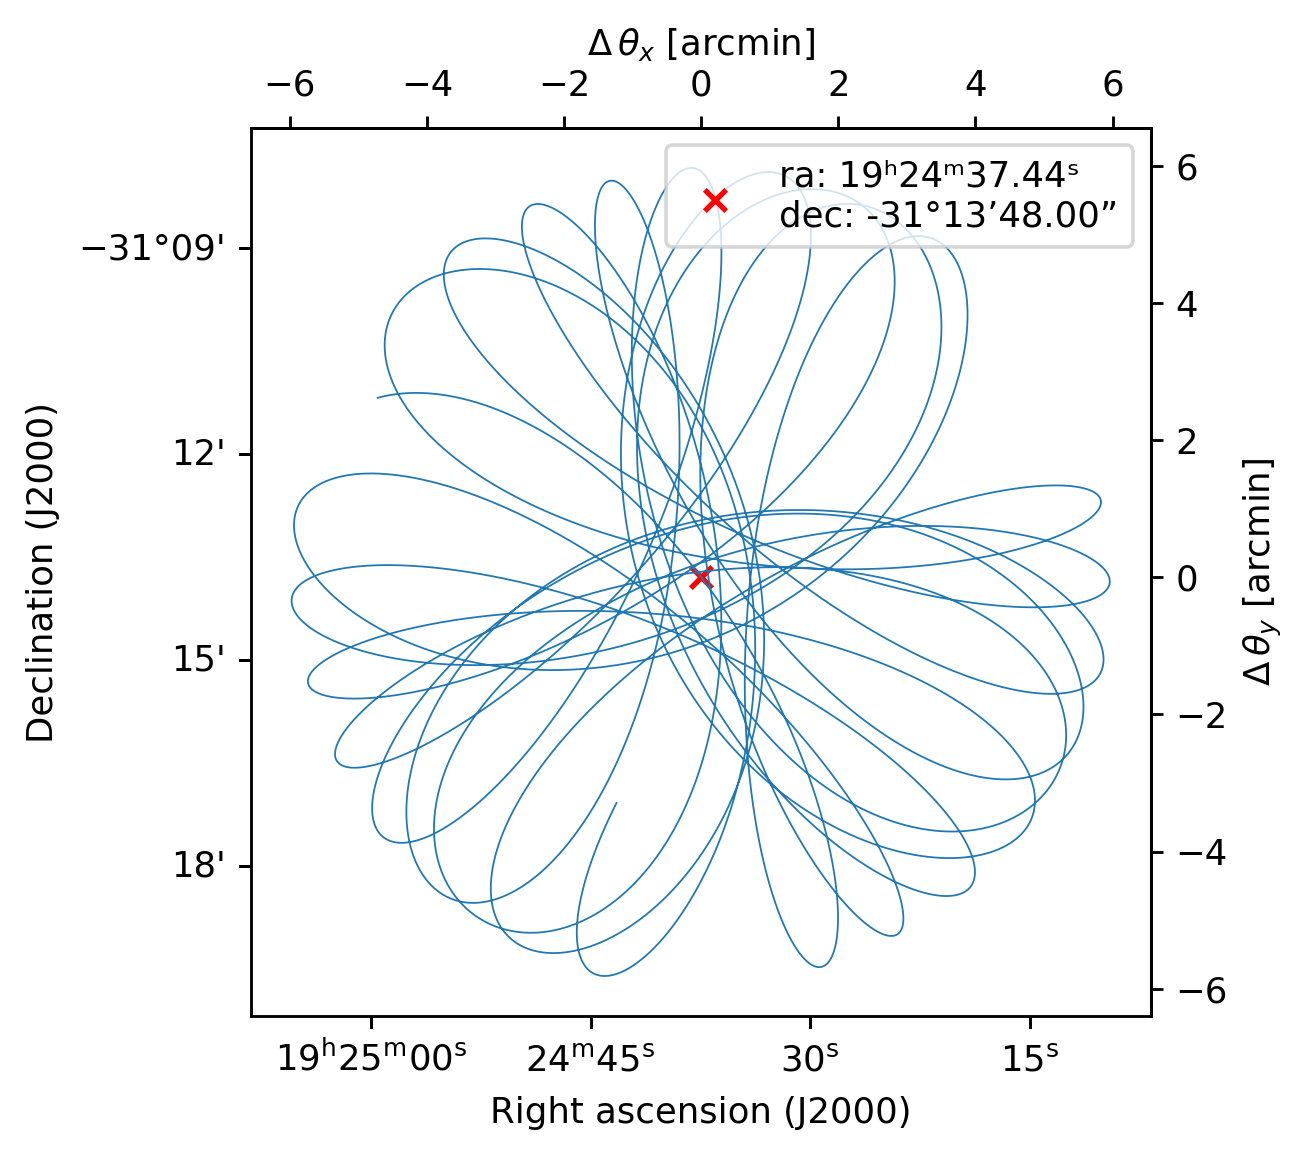

In [5]:
plan = maria.Plan(
    start_time="2024-08-06T03:00:00",
    scan_pattern="daisy",
    scan_options={"radius": 0.1, "speed": 0.01},  # in degrees
    duration=900,  # in seconds
    sample_rate=50,  # in Hz
    scan_center=(291.156, -31.23),
    frame="ra_dec")

print(plan)
plan.plot()

In [6]:
sim = maria.Simulation(
    instrument,
    plan=plan,
    site=site,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 0.5}},
    cmb="generate",
    map=input_map)

print(sim)

<Response [200]>


<Response [200]>


Constructing atmosphere:   0%|          | 0/10 [00:00<?, ?it/s]

Constructing atmosphere:  10%|█         | 1/10 [00:04<00:37,  4.13s/it]

Constructing atmosphere:  20%|██        | 2/10 [00:07<00:31,  3.97s/it]

Constructing atmosphere:  30%|███       | 3/10 [00:12<00:28,  4.09s/it]

Constructing atmosphere:  40%|████      | 4/10 [00:16<00:25,  4.17s/it]

Constructing atmosphere:  50%|█████     | 5/10 [00:21<00:22,  4.47s/it]

Constructing atmosphere:  60%|██████    | 6/10 [00:25<00:17,  4.28s/it]

Constructing atmosphere:  70%|███████   | 7/10 [00:29<00:12,  4.28s/it]

Constructing atmosphere:  80%|████████  | 8/10 [00:33<00:08,  4.27s/it]

Constructing atmosphere:  90%|█████████ | 9/10 [00:37<00:04,  4.19s/it]

Constructing atmosphere: 100%|██████████| 10/10 [00:42<00:00,  4.33s/it]

Constructing atmosphere: 100%|██████████| 10/10 [00:42<00:00,  4.26s/it]

Generating CMB (nside=2048):   0%|          | 0/1 [00:00<?, ?it/s]

<Response [200]>


Generating CMB (nside=2048): 100%|██████████| 1/1 [00:12<00:00, 12.32s/it]

Generating CMB (nside=2048): 100%|██████████| 1/1 [00:12<00:00, 12.32s/it]

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │             n     FOV baseline        bands polarized
│ │  array1  1356  5.953’      0 m  [f090,f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP   NET_RJ     NET_CMB    FWHM
│    0  f090   90 GHz  20 GHz  0.5  5.445 aW√s  40 uK√s  49.13 uK√s  8.748”
│    1  f150  150 GHz  30 GHz  0.5  12.25 aW√s  60 uK√s    104 uK√s  5.249”
├ Site:
│   region: chajnantor
│   location: 23°01’45.84”S 67°45’17.28”W
│   altitude: 5.065 km
│   seasonal: True
│   diurnal: True
├ Plan:
│   start_time: 2024-08-06 03:00:00.000 +00:00
│   duration: 900 s
│   sample_rate: 50 Hz
│   center:
│     ra: 19ʰ24ᵐ37.44ˢ
│     dec: -31°13’48.00”
│   scan_pattern: daisy
│   scan_radius: 11.99’
│   scan_kwargs: {'radius': 0.1, 'speed': 0.01}
├ Atmosphere(10 processes with 10 layers):
│ ├ spectrum:
│ │   region: chajnantor
│ └ weather:
│     region: chajnantor
│     altitude: 5.065 km
│     time: Aug 5 23:07:29 -04:00
│     pwv[mean, rms]: (0.5 mm

Generating turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Generating turbulence:  50%|█████     | 5/10 [00:00<00:00, 36.91it/s]

Generating turbulence:  90%|█████████ | 9/10 [00:00<00:00, 27.71it/s]

Generating turbulence: 100%|██████████| 10/10 [00:00<00:00, 27.45it/s]

Sampling turbulence:   0%|          | 0/10 [00:00<?, ?it/s]

Sampling turbulence:  10%|█         | 1/10 [00:01<00:15,  1.77s/it]

Sampling turbulence:  20%|██        | 2/10 [00:03<00:12,  1.60s/it]

Sampling turbulence:  30%|███       | 3/10 [00:04<00:10,  1.56s/it]

Sampling turbulence:  40%|████      | 4/10 [00:06<00:09,  1.54s/it]

Sampling turbulence:  50%|█████     | 5/10 [00:07<00:07,  1.54s/it]

Sampling turbulence:  60%|██████    | 6/10 [00:09<00:06,  1.56s/it]

Sampling turbulence:  70%|███████   | 7/10 [00:10<00:04,  1.56s/it]

Sampling turbulence:  80%|████████  | 8/10 [00:12<00:03,  1.56s/it]

Sampling turbulence:  90%|█████████ | 9/10 [00:14<00:01,  1.57s/it]

Sampling turbulence: 100%|██████████| 10/10 [00:15<00:00,  1.56s/it]

Sampling turbulence: 100%|██████████| 10/10 [00:15<00:00,  1.57s/it]

Computing atmospheric emission:   0%|          | 0/2 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Computing atmospheric emission:  50%|█████     | 1/2 [00:05<00:05,  5.91s/it, band=f090]

Computing atmospheric emission:  50%|█████     | 1/2 [00:05<00:05,  5.91s/it, band=f150]

Computing atmospheric emission: 100%|██████████| 2/2 [00:11<00:00,  5.84s/it, band=f150]

Computing atmospheric emission: 100%|██████████| 2/2 [00:11<00:00,  5.85s/it, band=f150]

Sampling CMB:   0%|          | 0/2 [00:00<?, ?it/s]

Sampling CMB:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Sampling CMB:   0%|          | 0/2 [00:17<?, ?it/s, band=f090, stokes=I]

Sampling CMB:   0%|          | 0/2 [00:17<?, ?it/s, band=f090, stokes=Q]

Sampling CMB:   0%|          | 0/2 [00:17<?, ?it/s, band=f090, stokes=U]

Sampling CMB:  50%|█████     | 1/2 [00:17<00:17, 17.63s/it, band=f090, stokes=U]

Sampling CMB:  50%|█████     | 1/2 [00:17<00:17, 17.63s/it, band=f150]          

Sampling CMB:  50%|█████     | 1/2 [00:33<00:17, 17.63s/it, band=f150, stokes=I]

Sampling CMB:  50%|█████     | 1/2 [00:33<00:17, 17.63s/it, band=f150, stokes=Q]

Sampling CMB:  50%|█████     | 1/2 [00:33<00:17, 17.63s/it, band=f150, stokes=U]

Sampling CMB: 100%|██████████| 2/2 [00:33<00:00, 16.64s/it, band=f150, stokes=U]

Sampling CMB: 100%|██████████| 2/2 [00:33<00:00, 16.79s/it, band=f150, stokes=U]

Sampling map:   0%|          | 0/2 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Sampling map:   0%|          | 0/2 [00:04<?, ?it/s, channel=[ 0. inf] Hz]

Sampling map:  50%|█████     | 1/2 [00:10<00:10, 10.31s/it, channel=[ 0. inf] Hz]

Sampling map:  50%|█████     | 1/2 [00:10<00:10, 10.31s/it, band=f150]           

Sampling map:  50%|█████     | 1/2 [00:14<00:10, 10.31s/it, channel=[ 0. inf] Hz]

Sampling map: 100%|██████████| 2/2 [00:20<00:00, 10.29s/it, channel=[ 0. inf] Hz]

Sampling map: 100%|██████████| 2/2 [00:20<00:00, 10.29s/it, channel=[ 0. inf] Hz]

Generating noise:   0%|          | 0/2 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/2 [00:00<?, ?it/s, band=f090]

Generating noise:  50%|█████     | 1/2 [00:01<00:01,  1.28s/it, band=f090]

Generating noise:  50%|█████     | 1/2 [00:01<00:01,  1.28s/it, band=f150]

Generating noise: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it, band=f150]

Generating noise: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it, band=f150]

TOD(shape=(1356, 45000), fields=['atmosphere', 'cmb', 'map', 'noise'], units='pW', start=2024-08-06 03:14:59.979 +00:00, duration=900.0s, sample_rate=50.0Hz, metadata={'atmosphere': True, 'sim_time': <Arrow [2025-05-17T02:07:13.976005+00:00]>, 'altitude': 5065.0, 'region': 'chajnantor', 'pwv': 0.5, 'base_temperature': 272.523})


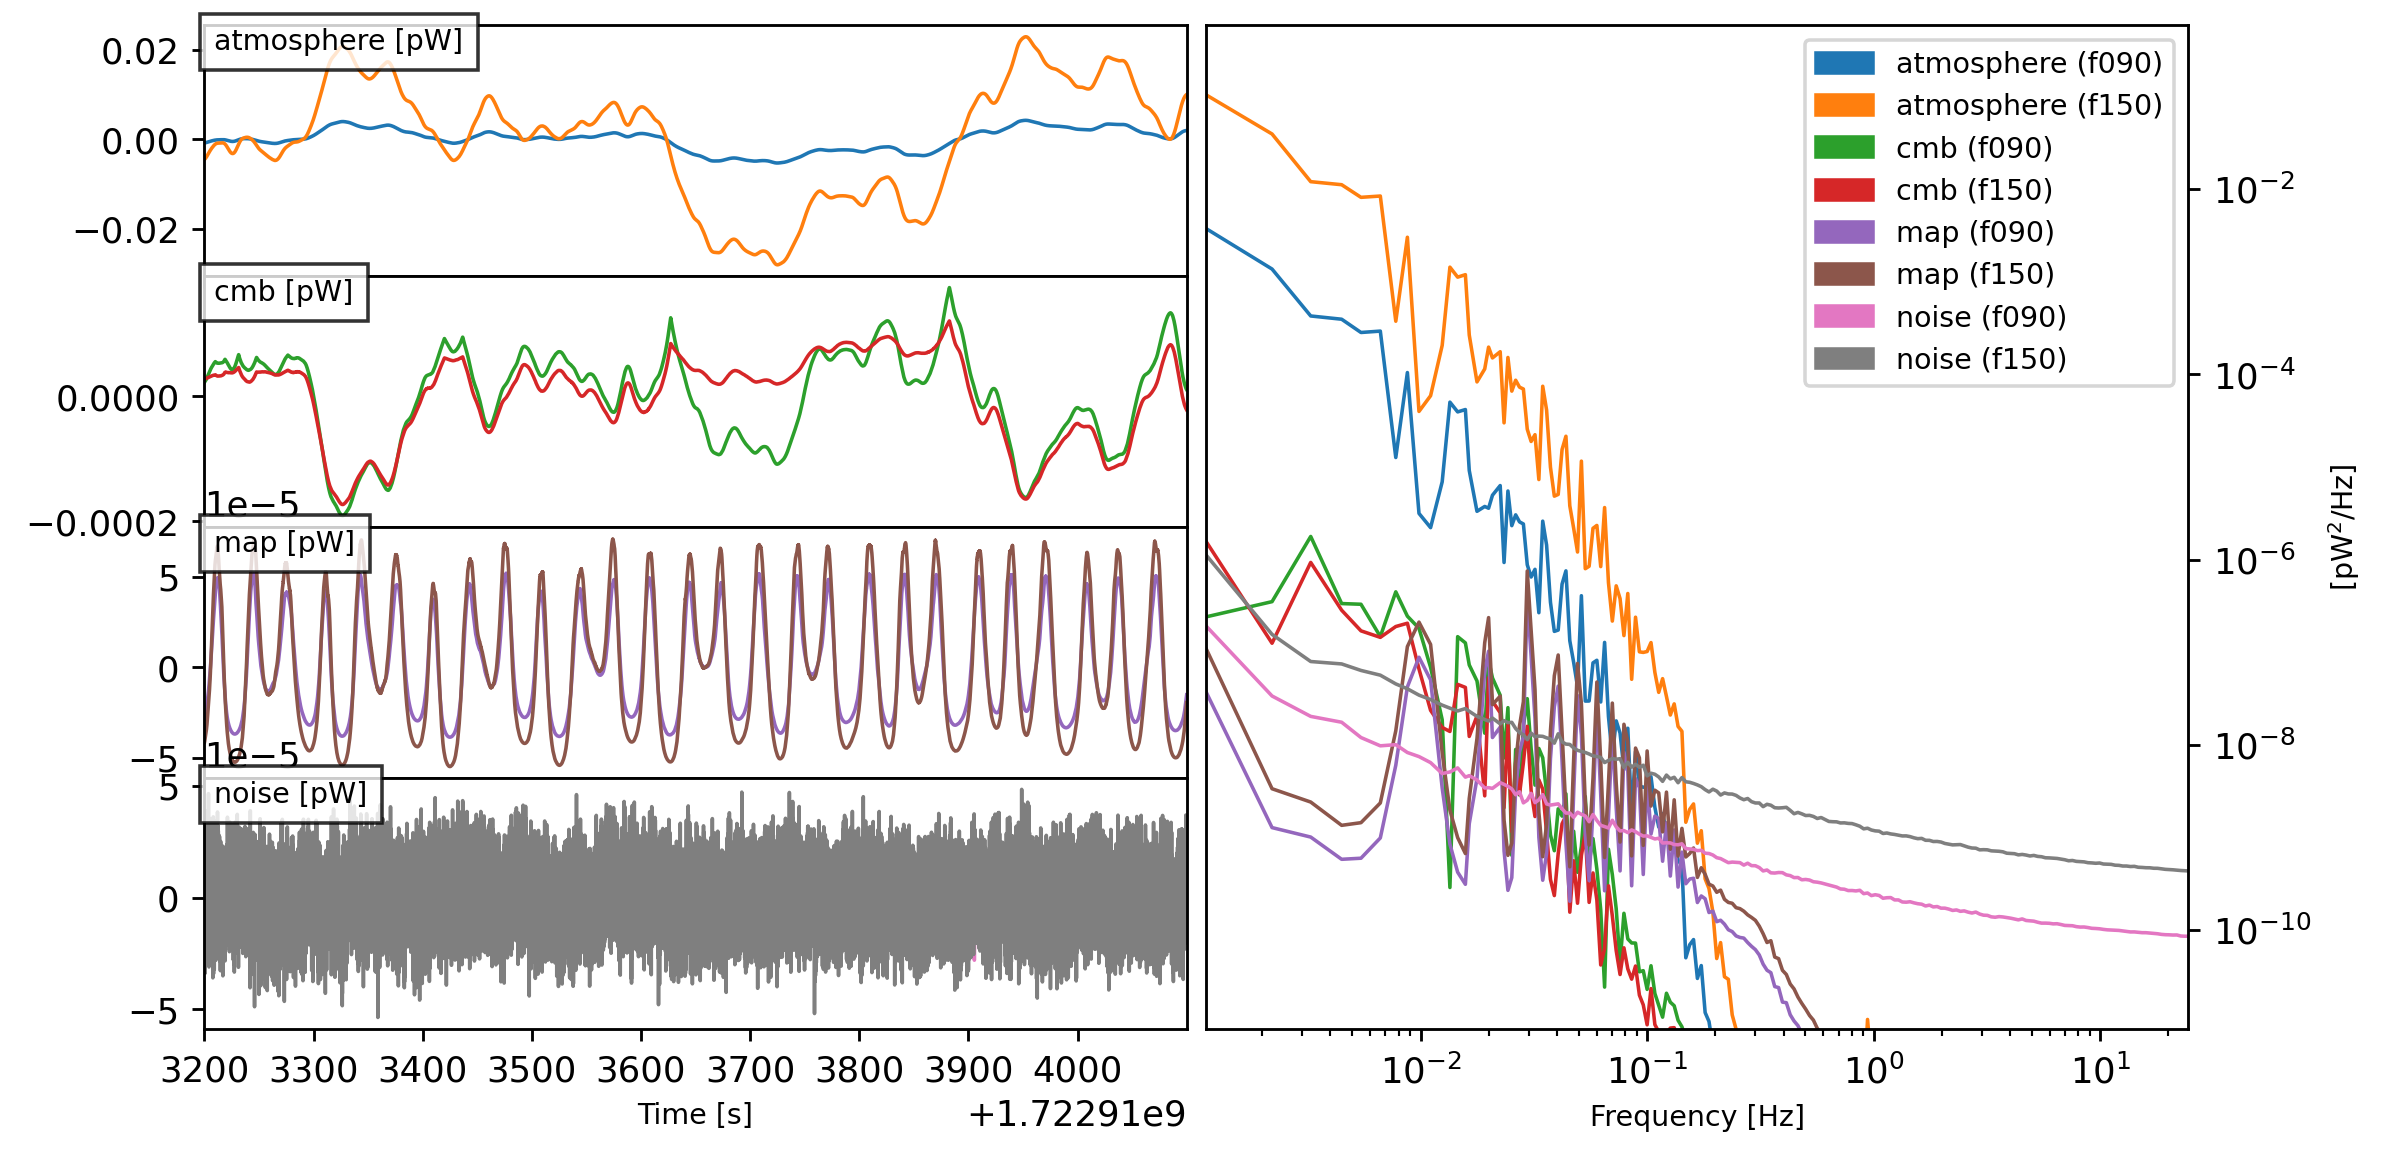

In [7]:
tod = sim.run()

print(tod)
tod.plot()

In [8]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=(291.156, -31.23),
    frame="ra_dec",
    width=0.25,
    height=0.25,
    resolution=0.25 / 256,
    tod_preprocessing={
        "window": {"name": "tukey", "kwargs": {"alpha": 0.1}},
        "remove_spline": {"knot_spacing": 30, "remove_el_gradient": True},
        "remove_modes": {"modes_to_remove": [0]},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
    },
    units="mK_RJ",
)

mapper.add_tods(tod)

output_map = mapper.run()

Mapping band f090:   0%|          | 0/1 [00:00<?, ?it/s]

Mapping band f090:   0%|          | 0/1 [00:00<?, ?it/s, band=f090, stokes=I]

Mapping band f090: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s, band=f090, stokes=I]

Mapping band f090: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s, band=f090, stokes=I]


2025-05-17 02:07:35.817 INFO: Ran mapper for band f090 in 14.82 s.


Mapping band f150:   0%|          | 0/1 [00:00<?, ?it/s]

Mapping band f150:   0%|          | 0/1 [00:00<?, ?it/s, band=f150, stokes=I]

Mapping band f150: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s, band=f150, stokes=I]

Mapping band f150: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s, band=f150, stokes=I]


2025-05-17 02:07:50.475 INFO: Ran mapper for band f150 in 14.65 s.


We can see the recovered map with

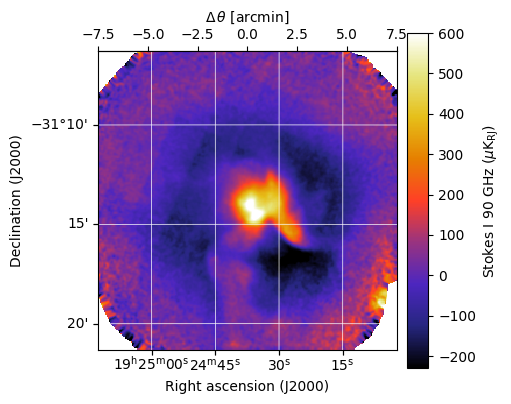

In [9]:
output_map.plot()